In [ ]:
고해상도 이미지 생성 Stable Diffusion v2

#https://www.youtube.com/watch?v=JTw4WNC1Dy4 참고
https://huggingface.co/stabilityai/stable-diffusion-2

@InProceedings{Rombach_2022_CVPR,
    author    = {Rombach, Robin and Blattmann, Andreas and Lorenz, Dominik and Esser, Patrick and Ommer, Bj\"orn},
    title     = {High-Resolution Image Synthesis With Latent Diffusion Models},
    booktitle = {Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR)},
    month     = {June},
    year      = {2022},
    pages     = {10684-10695}
}

In [ ]:
!nvidia-smi

Mon Jul  3 05:07:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 파이썬 패키지 설치

5분 소요

In [ ]:
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate scipy xformers gradio translate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

## 모델 다운로드 및 로드

- 60초 소요 (A100-SXM4-40GB)
- 90초 소요 (Tesla T4)

unet/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

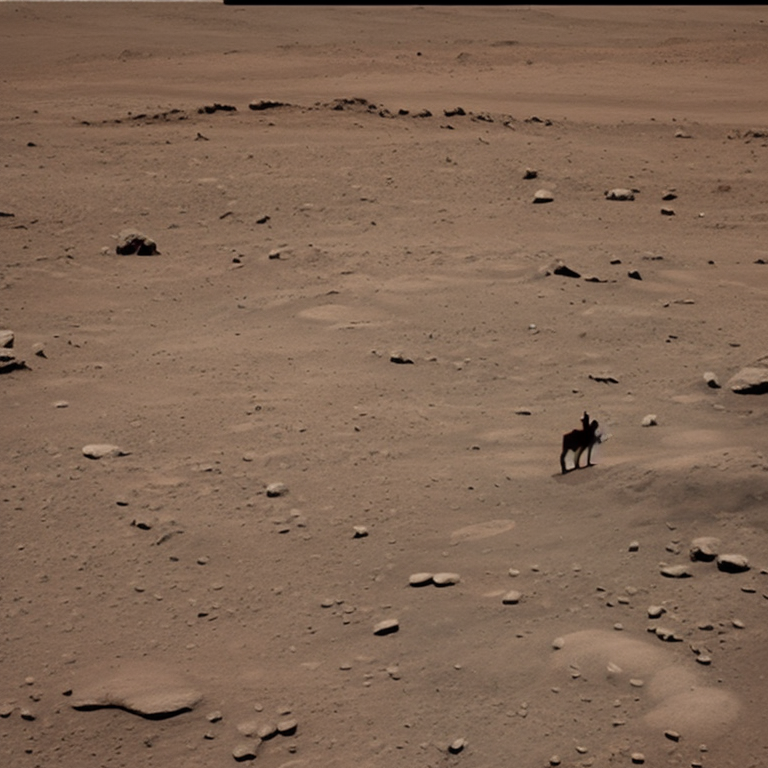

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=768, width=768).images[0]

image.save("astronaut_rides_horse.png")

image

unet/diffusion_pytorch_model.safetensors not found


  0%|          | 0/50 [00:00<?, ?it/s]

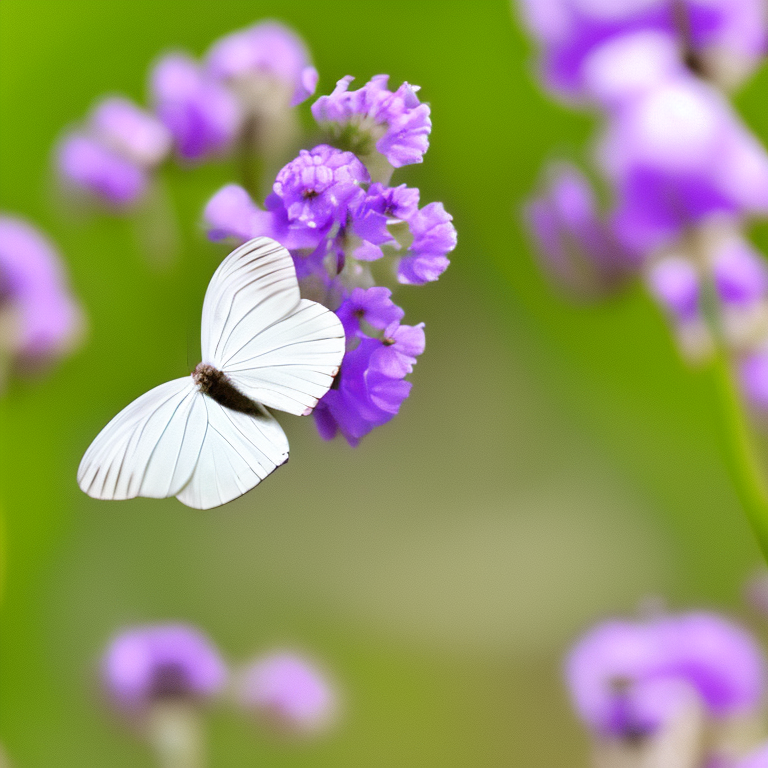

In [ ]:
# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a white butterfly flying around a flower"
image = pipe(prompt, height=768, width=768).images[0]

image.save("astronaut_rides_horse.png")

image

## 영어 번역 및 이미지 생성 함수 정의

- 6초 소요 (A100-SXM4-40GB)
- 28초 소요 (Tesla T4)

개코원숭이가 토성의 고리에 올라타 즐거워 하고 있다
A baboon climbs into the rings of Saturn and rejoices.


  0%|          | 0/50 [00:00<?, ?it/s]

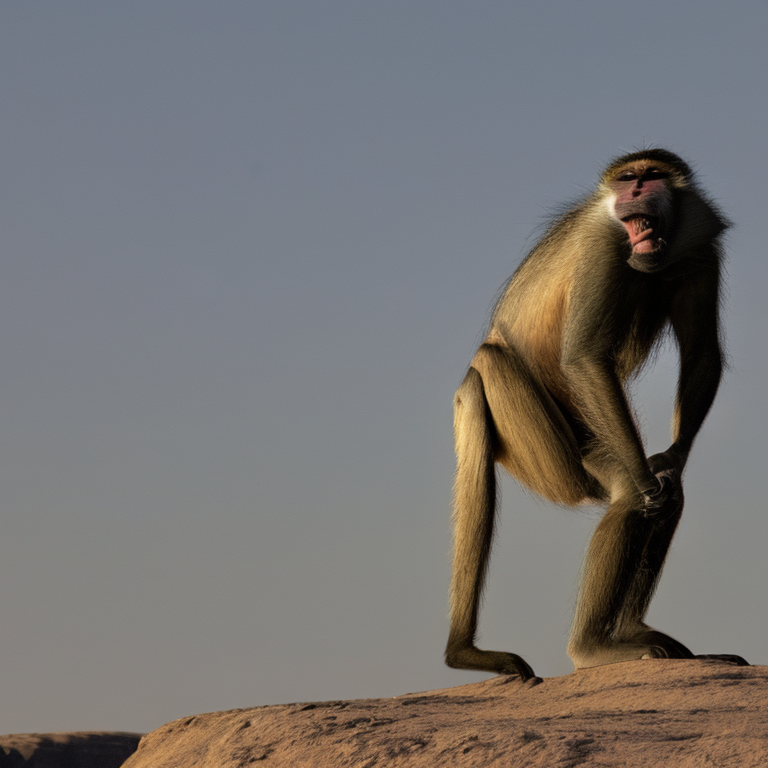

In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

def generate_images(text):
    print(text)
    translation = translator.translate(text)
    print(translation)

    image = pipe(translation, height=768, width=768).images[0]

    return image
    #image.save("image_0703.png")

generate_images("개코원숭이가 토성의 고리에 올라타 즐거워 하고 있다")
#image.save("image_0711.png")

In [ ]:
image.save("0703.png")

비바람이 몰아치는 격랑이 이는 사진같은 바다
Riots in the wind and picturesque seas


  0%|          | 0/50 [00:00<?, ?it/s]

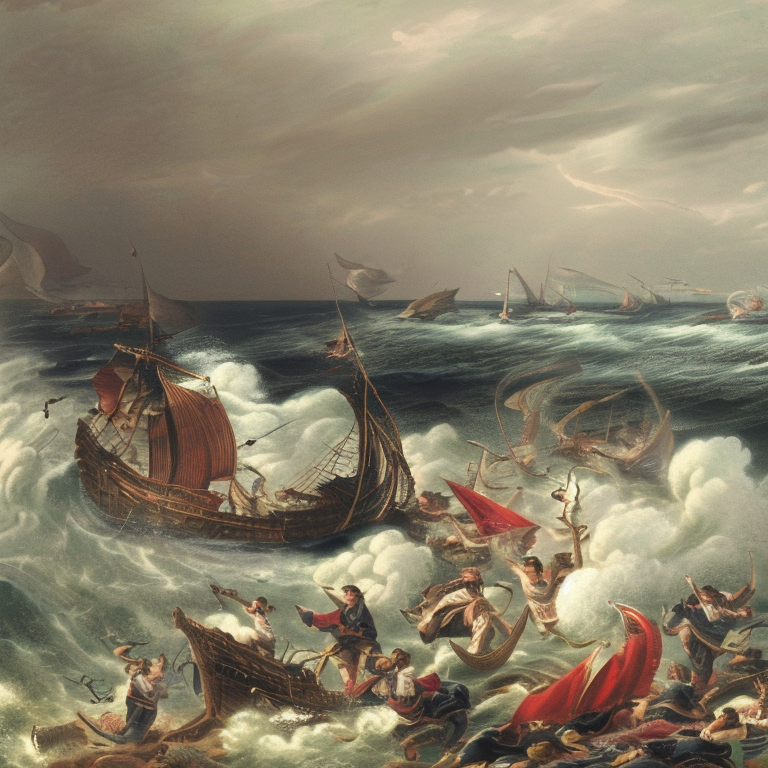

In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

def generate_images(text):
    print(text)
    translation = translator.translate(text)
    print(translation)

    image = pipe(translation, height=768, width=768).images[0]

    return image

generate_images("비바람이 몰아치는 격랑이 이는 사진같은 바다")

In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr

def inference(text):
    return generate_images(text)

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c68a1961382509767f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Riots in the wind and picturesque seas
Riots in the wind and picturesque seas


  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c68a1961382509767f.gradio.live


In [ ]:
콜라브 노트북이 탐지되었습니다. 오류 및 로그를 확인할 수 있도록 이 셀은 무기한 실행됩니다. 해제하려면 실행 시 debug=False를 설정합니다.
공용 URL에서 실행 중: https://c68a1961382509767f.gradio.live

이 공유 링크는 72시간 후에 만료됩니다. 무료 영구 호스팅 및 GPU 업그레이드를 위해 터미널에서 "gradio deploy"를 실행하여 Spaces에 배포(https://huggingface.co/spaces)